In [1]:
# The bulk of this code was taken from this article:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

In [2]:
# Load Yahoo! Finance Dataset with pandas DataReader
%matplotlib notebook
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame, plotting
from pandas.plotting import scatter_matrix
import math
import numpy as np


start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 11, 5)

df = web.DataReader("SBUX", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-30,88.389999,85.629997,87.750000,86.959999,11400700.0,86.959999
2020-11-02,87.769997,85.449997,87.540001,85.970001,8904900.0,85.970001
2020-11-03,89.059998,86.180000,86.779999,88.389999,6910400.0,88.389999
2020-11-04,91.290001,88.739998,88.900002,89.790001,10509400.0,89.790001
2020-11-05,91.160004,89.900002,90.690002,90.620003,6169700.0,90.620003


In [3]:
# Code the Moving Average
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

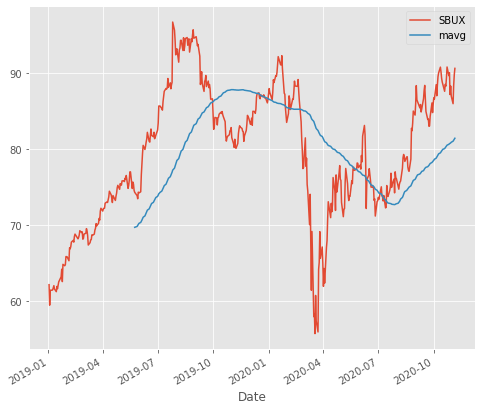

In [4]:
# Plot Moving Average
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='SBUX')
mavg.plot(label='mavg')
plt.legend()

<AxesSubplot:xlabel='Date'>

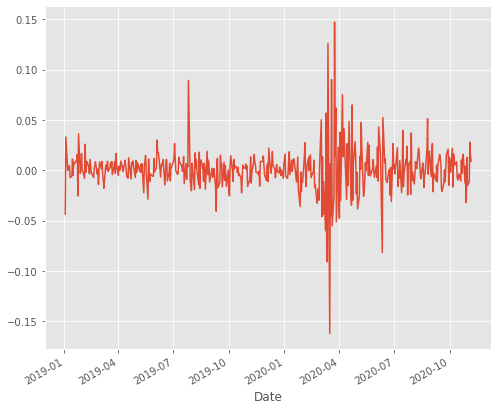

In [5]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [6]:
# Moving Average for Large Cap Quick Service Restaurant industry
dfcomp = web.DataReader(['SBUX', 'MCD', 'QSR', 'YUM'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,SBUX,MCD,QSR,YUM
Date,,,,
2020-10-30,86.959999,213.000000,52.000000,93.330002
2020-11-02,85.970001,212.559998,51.759998,95.250000
2020-11-03,88.389999,216.800003,54.000000,96.769997
2020-11-04,89.790001,214.869995,53.910000,98.580002
2020-11-05,90.620003,216.309998,54.049999,100.699997


In [7]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

Text(0, 0.5, 'Returns MCD')

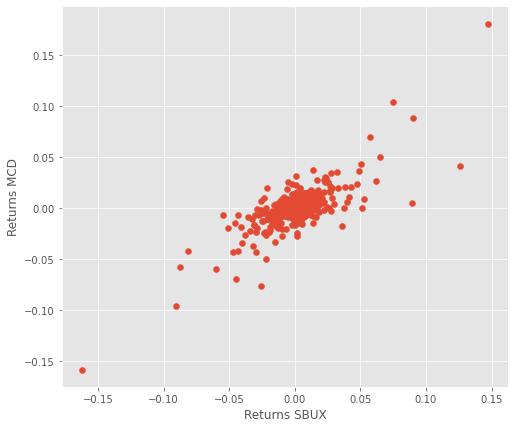

In [8]:
plt.scatter(retscomp.SBUX, retscomp.MCD)
plt.xlabel('Returns SBUX')
plt.ylabel('Returns MCD')

In [9]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.00
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.00

In [10]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [11]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [12]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

In [13]:
# Scale the X so that everyone can have the same distribution for linear regression
from sklearn import preprocessing
X = preprocessing.scale(X)

In [14]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [15]:
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [16]:
# Model Generation
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [17]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X, y)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X, y)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])